## Data Scientist

In [1]:
from syft_rds.client.rds_client import init_session

HOST_EMAIL = "khoa@openmined.org"
CONFIG = "~/.syftbox/config_stage_khoa2.json"
rds_client = init_session(HOST_EMAIL, syftbox_client_config_path=CONFIG)
print(f"host: {rds_client.host}")
print(f"me: {rds_client.email}")
print(f"is admin?: {rds_client.is_admin}")

host: khoa@openmined.org
me: khoa2@openmined.org
is admin?: False


In [3]:
datasets = rds_client.dataset.get_all()
datasets

[Dataset
   uid: 8392f833-26aa-4869-833c-38c09f96b8af
   created_at: 2025-03-05T07:56:24.984202Z
   updated_at: 2025-03-05T07:56:24.984207Z
   name: Census
   private: syft://khoa@openmined.org/private/datasets/Census
   mock: syft://khoa@openmined.org/public/datasets/Census
   summary: Sample census dataset, 10 rows for mock and 10 rows for private
   readme: syft://khoa@openmined.org/public/datasets/Census/README.md
   tags: [],
 Dataset
   uid: a043ddfe-bdec-4671-bc3d-e1115677b6d1
   created_at: 2025-03-05T07:56:36.656448Z
   updated_at: 2025-03-05T07:56:36.656453Z
   name: MedMNIST
   private: syft://khoa@openmined.org/private/datasets/MedMNIST
   mock: syft://khoa@openmined.org/public/datasets/MedMNIST
   summary: Sample Medical MNIST dataset, 5 images for each class
   readme: syft://khoa@openmined.org/public/datasets/MedMNIST/README.md
   tags: []]

### Exploring the first dataset

In [4]:
med_mnist = rds_client.dataset.get("MedMNIST")
med_mnist

Dataset
  uid: a043ddfe-bdec-4671-bc3d-e1115677b6d1
  created_at: 2025-03-05T07:56:36.656448Z
  updated_at: 2025-03-05T07:56:36.656453Z
  name: MedMNIST
  private: syft://khoa@openmined.org/private/datasets/MedMNIST
  mock: syft://khoa@openmined.org/public/datasets/MedMNIST
  summary: Sample Medical MNIST dataset, 5 images for each class
  readme: syft://khoa@openmined.org/public/datasets/MedMNIST/README.md
  tags: []

In [21]:
med_mnist.describe()

├── val
│   ├── ChestCT
│   │   ├── 000050.jpeg
│   │   ├── 000046.jpeg
│   │   ├── 000051.jpeg
│   │   ├── 000055.jpeg
│   │   └── 000049.jpeg
│   ├── HeadCT
│   │   ├── 000050.jpeg
│   │   ├── 000046.jpeg
│   │   ├── 000051.jpeg
│   │   ├── 000055.jpeg
│   │   └── 000049.jpeg
│   ├── BreastMRI
│   │   ├── 000028.jpeg
│   │   ├── 000044.jpeg
│   │   ├── 000042.jpeg
│   │   ├── 000032.jpeg
│   │   └── 000049.jpeg
│   ├── Hand
│   │   ├── 000051.jpeg
│   │   └── 000055.jpeg
│   ├── CXR
│   │   ├── 000050.jpeg
│   │   └── 000049.jpeg
│   └── AbdomentCT
│       ├── 000050.jpeg
│       ├── 000046.jpeg
│       ├── 000051.jpeg
│       ├── 000055.jpeg
│       └── 000049.jpeg
├── train
│   ├── ChestCT
│   │   ├── 000000.jpeg
│   │   ├── 000006.jpeg
│   │   ├── 000005.jpeg
│   │   ├── 000004.jpeg
│   │   └── 000003.jpeg
│   ├── HeadCT
│   │   ├── 000000.jpeg
│   │   ├── 000006.jpeg
│   │   ├── 000005.jpeg
│   │   ├── 000004.jpeg
│   │   └── 000003.jpeg
│   ├── BreastMRI
│   │   ├── 000000.jpeg


True

In [6]:
med_mnist.get_description()

"This dataset contains over 50000 images in 6 classes, splitted for train, test and val pics. It's like a 'hello world' in start of machine learning in medicine based on https://www.kaggle.com/datasets/andrewmvd/medical-mnist..\n\nLink to kaggle: https://www.kaggle.com/datasets/gennadiimanzhos/medical-mnist-train-test-val\n"

In [7]:
# will raise error
med_mnist.get_private_path()

FileNotFoundError: Private data not found at /home/khoaguin/SyftBoxStage_khoa2/datasites/khoa@openmined.org/private/datasets/MedMNIST

Audited 1 package in 2ms


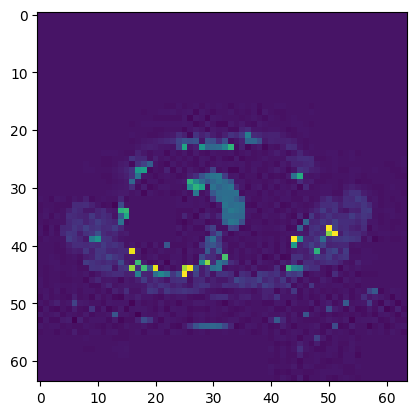

In [20]:
!uv pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

test_dir = med_mnist.get_mock_path() / "test"
first_subdir = next(d for d in test_dir.iterdir() if d.is_dir())
first_jpeg = next(first_subdir.glob("*.jpeg"))
img = np.asarray(Image.open(first_jpeg))
plt.imshow(img)

### Exploring the second dataset

In [22]:
census = rds_client.dataset.get("Census")
census

Dataset
  uid: 8392f833-26aa-4869-833c-38c09f96b8af
  created_at: 2025-03-05T07:56:24.984202Z
  updated_at: 2025-03-05T07:56:24.984207Z
  name: Census
  private: syft://khoa@openmined.org/private/datasets/Census
  mock: syft://khoa@openmined.org/public/datasets/Census
  summary: Sample census dataset, 10 rows for mock and 10 rows for private
  readme: syft://khoa@openmined.org/public/datasets/Census/README.md
  tags: []

In [23]:
census.get_description()

'Sample census dataset'

In [24]:
census.describe()

├── data.csv
└── README.md


True

In [25]:
census.get_mock_path()

PosixPath('/home/khoaguin/SyftBoxStage_khoa2/datasites/khoa@openmined.org/public/datasets/Census')

In [26]:
import pandas as pd

pd.read_csv(census.get_mock_path() / "data.csv")

,ID,Name,Age,Gender,Occupation,Income,Education,Marital Status,State
0,1,William Clark,31,M,Architect,72000,Master's,Single,California
1,2,Elizabeth Lewis,27,F,Pharmacist,85000,Doctorate,Married,New York
2,3,Christopher Lee,44,M,Mechanic,45000,High School,Married,Texas
3,4,Jessica Walker,23,F,Journalist,41000,Bachelor's,Single,Florida
4,5,Daniel Hall,51,M,Financial Analyst,99000,Master's,Married,Illinois
5,6,Barbara Allen,39,F,Teacher,60000,Master's,Married,Ohio
6,7,Matthew Young,30,M,Web Developer,65000,Bachelor's,Single,Washington
7,8,Angela Hernandez,42,F,HR Manager,73000,Bachelor's,Married,Arizona
8,9,Joshua King,34,M,Plumber,50000,High School,Single,Georgia
9,10,Stephanie Scott,25,F,Graphic Designer,47000,Bachelor's,Single,Colorado


In [27]:
# will raise error
census.get_private_path()

FileNotFoundError: Private data not found at /home/khoaguin/SyftBoxStage_khoa2/datasites/khoa@openmined.org/private/datasets/Census